# Clustering (K-Means) para segmentación de imágenes

## Segmentación de imágenes

La segmentación de imágenes es el proceso de dividir una imagen en diferentes regiones o conjuntos de píxeles con características similares. El objetivo principal es simplificar la representación de la imagen para facilitar su análisis o procesamiento. Se utiliza en aplicaciones como visión por computadora, análisis médico, reconocimiento de objetos y más.

### Algoritmos de segmentación de imágenes
🔹 Basados en umbralización
* Umbralización simple
* Umbralización adaptativa
* Método de Otsu

🔹 Basados en clustering
* K-Means
* Mean-Shift
* Gaussian Mixture Models (GMM)

🔹 Basados en regiones
* Crecimiento de regiones
* Dividir y fusionar (Split and Merge)
* Watershed

🔹 Basados en contornos
* Detección de bordes (Canny, Sobel, Prewitt)
* Active Contours (Snakes)

🔹 Basados en aprendizaje profundo
* Redes Neuronales Convolucionales (CNN)
* U-Net
* Mask R-CNN

## Clustering K-Means para Segmentación de Imágenes



El objetivo de K-Means en segmentación de imágenes es **agrupar píxeles similares** en distintas regiones según sus características (generalmente basadas en color, textura o intensidad).

Cada píxel $\mathbf{x}_i$ es un punto en un espacio de características (por ejemplo, en un espacio de color como RGB o Lab).

---

### Algoritmo de K-Means

El algoritmo de K-Means sigue estos pasos:

1. **Inicialización**: Seleccionar $K$ centroides $\mathbf{\mu}_j$ de forma aleatoria o con un método como **K-Means++**.

2. **Asignación de Clústeres**: Para cada píxel $\mathbf{x}_i$, asignarlo al clúster más cercano:
   
   $$
   c_i = \arg\min_{j} \|\mathbf{x}_i - \mathbf{\mu}_j\|^2
   $$
   
   donde $c_i$ es el índice del clúster asignado a $\mathbf{x}_i$.

3. **Actualización de Centroides**: Recalcular los centroides como el promedio de los puntos asignados a cada clúster:
   
   $$
   \mathbf{\mu}_j = \frac{1}{|C_j|} \sum_{\mathbf{x}_i \in C_j} \mathbf{x}_i
   $$
   
   donde $C_j$ es el conjunto de píxeles asignados al clúster $j$.

4. **Repetición**: Repetir los pasos 2 y 3 hasta que los centroides **dejen de cambiar** significativamente o se alcance un número máximo de iteraciones.

---

### Distancias Comunes en Segmentación

La métrica de distancia afecta la calidad de la segmentación. Algunas opciones son:

- **Euclidiana** (más común en RGB/Lab):
  
  $$
  d(\mathbf{x}_i, \mathbf{\mu}_j) = \sqrt{(R_i - R_j)^2 + (G_i - G_j)^2 + (B_i - B_j)^2}
  $$

- **Manhattan (L1)**:
  
  $$
  d(\mathbf{x}_i, \mathbf{\mu}_j) = |R_i - R_j| + |G_i - G_j| + |B_i - B_j|
  $$

- **CIEDE2000** (para mejorar percepción visual en Lab):
  
  $$
  d_{\text{CIEDE2000}}(\mathbf{x}_i, \mathbf{\mu}_j) = \text{función compleja en Lab}
  $$

---

### Métodos de Mejora

- **K-Means en espacio de color y coordenadas espaciales**:
  - En vez de usar solo $(R,G,B)$, se pueden usar **coordenadas espaciales** $(x,y)$ para evitar regiones discontinuas:
    
    $$
    \mathbf{x}_i = (R, G, B, x, y)
    $$

- **K-Means con PCA**:
  - Si los datos tienen muchas dimensiones, se puede usar **Análisis de Componentes Principales (PCA)** para reducirlos antes de aplicar K-Means.

- **K-Means con histogramas de color**:
  - Se agrupan píxeles según histogramas en lugar de valores individuales.

- **Método de Elbow para elegir $K$**:
  - Se calcula la **Suma de Errores Cuadrados (SSE)** para distintos valores de $K$ y se usa la "curva de codo":
    
    $$
    \text{SSE} = \sum_{i=1}^{N} \|\mathbf{x}_i - \mathbf{\mu}_{c_i}\|^2
    $$

---

### Cuándo usar K-Means para segmentación de imágenes

* Cuando la segmentación se basa en colores
* Cuando se busca una segmentación rápida y simple
* Para preprocesamiento en otros métodos de visión por computadora
* Para imágenes con poco ruido y bien diferenciadas


---

### Cuándo **NO** usar K-Means para segmentación de imágenes
* Cuando la segmentación requiere información espacial
* Para imágenes con mucho ruido o texturas complejas
* Si los objetos no están bien diferenciados en color
* Cuando la imagen tiene cambios de iluminación



## Demo del algoritmo

### Librerias

In [9]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt
import random
from PIL import Image
from utils import *

### Comparación entre el algoritmo empleado y los algoritmos de librerías

In [ ]:
path = r'data\images\camisa.webp'
K = 2
image = load_image(path)
titles = ['Imagen Original', f'Imagen Segmentada ({K} colores)']
cluster_names = [f"Cluster {i+1}" for i in range(K)]


#### Algoritmo empleado

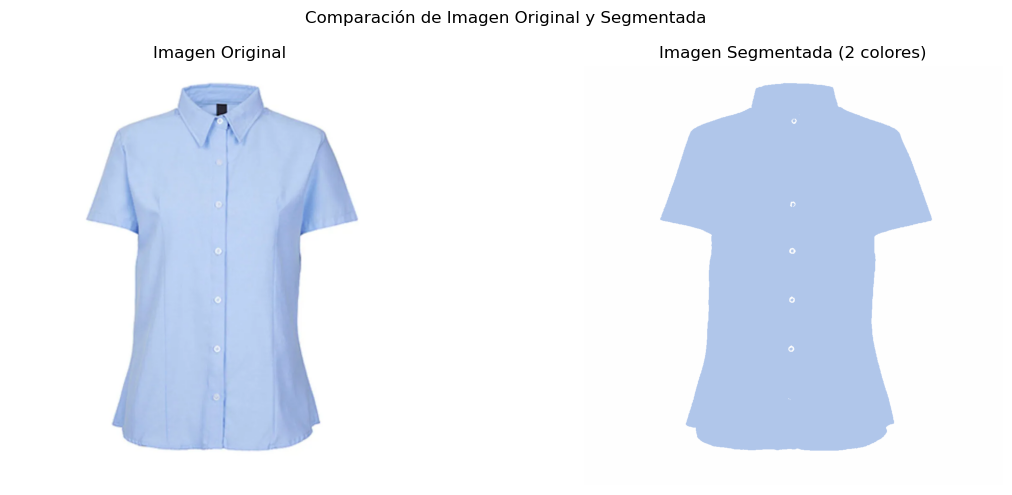

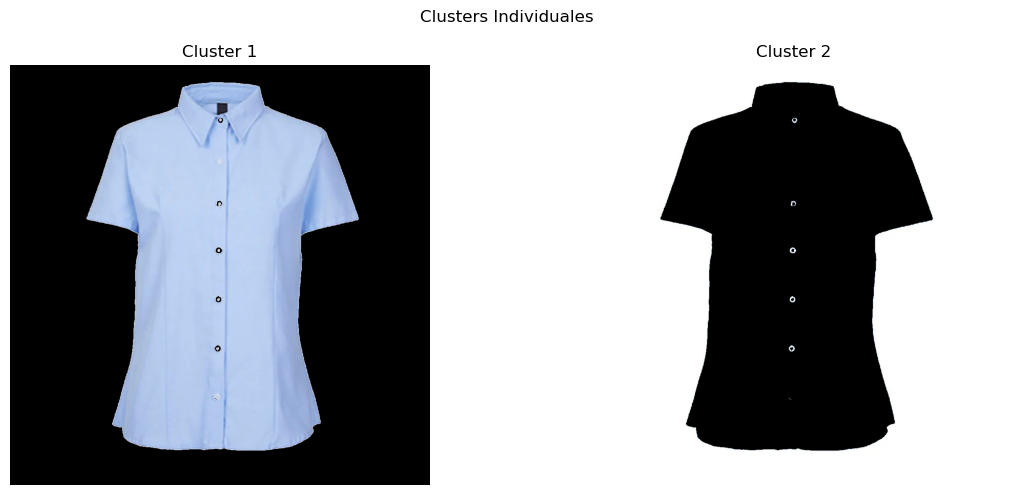

In [11]:
segmenter = KMeansImageSegmenter(k=K, max_iters=30)

# Aplicar la segmentación a una imagen
manual_segmented_image = segmenter.fit(image)
# Mostrar la imagen segmentada
show_multi_images(
    [image,manual_segmented_image], 
    titles=titles,
    cols=2,
    subtitle = "Comparación de Imagen Original y Segmentada" 
)

# Aplicar las máscaras a la imagen original
masked_images = segmenter.apply_masks(image)
# Mostrar las partes de la imagen original correspondientes a cada cluster
show_multi_images(
    masked_images, 
    titles=cluster_names,  
    cols=2, 
    subtitle="Clusters Individuales")

#### Sklearn

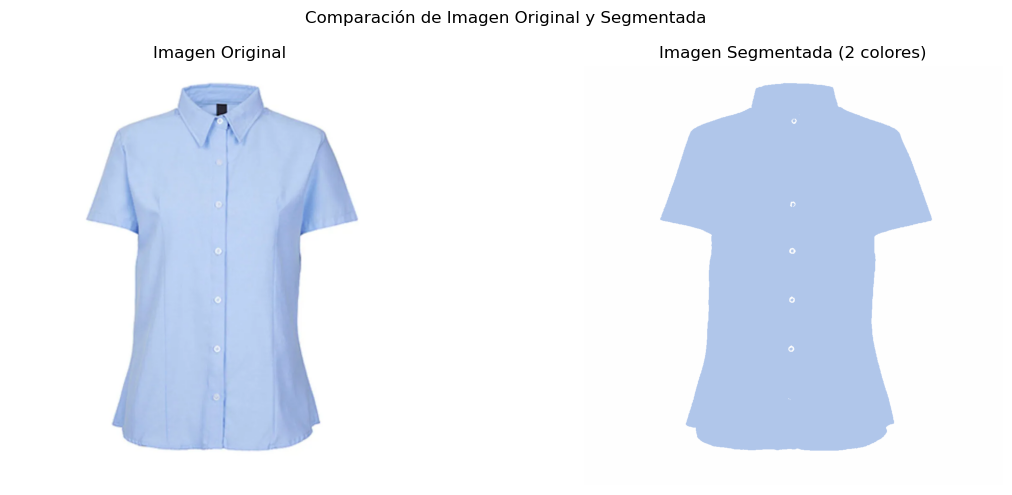

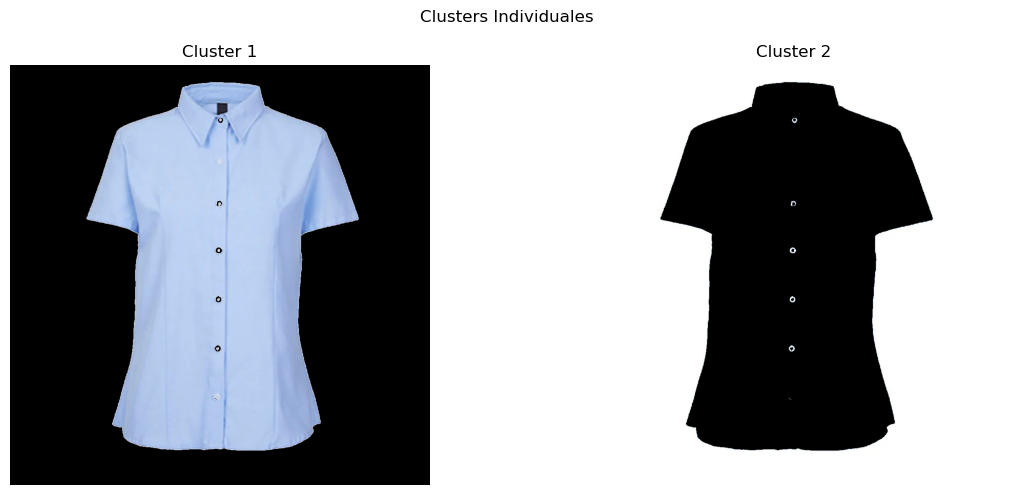

In [12]:
# Transformar la imagen en un arreglo de píxeles
pixels = image.reshape((-1, 3))

# Aplicar K-means
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(pixels)

# Reasignar colores según los centroides
segmented_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)
pixel_labels = kmeans.labels_.reshape(image.shape[:2])

segmented_images = []
for k in range(K):
    mask = (pixel_labels == k).astype(np.uint8)
    segmented = cv2.bitwise_and(image, image, mask=mask)
    segmented_images.append(segmented)

show_multi_images(
    [image, segmented_image],
    titles,
    cols=2,
    subtitle= "Comparación de Imagen Original y Segmentada"
)

# Mostrar imágenes de los clusters
show_multi_images(
    segmented_images,
    cluster_names,
    cols=2,  # Se muestra en una cuadrícula de 2 columnas
    subtitle="Clusters Individuales"
)

### Ejemplos de aplicación

Detección y Extracción de Ropa o Agrupación de Camisas por Color

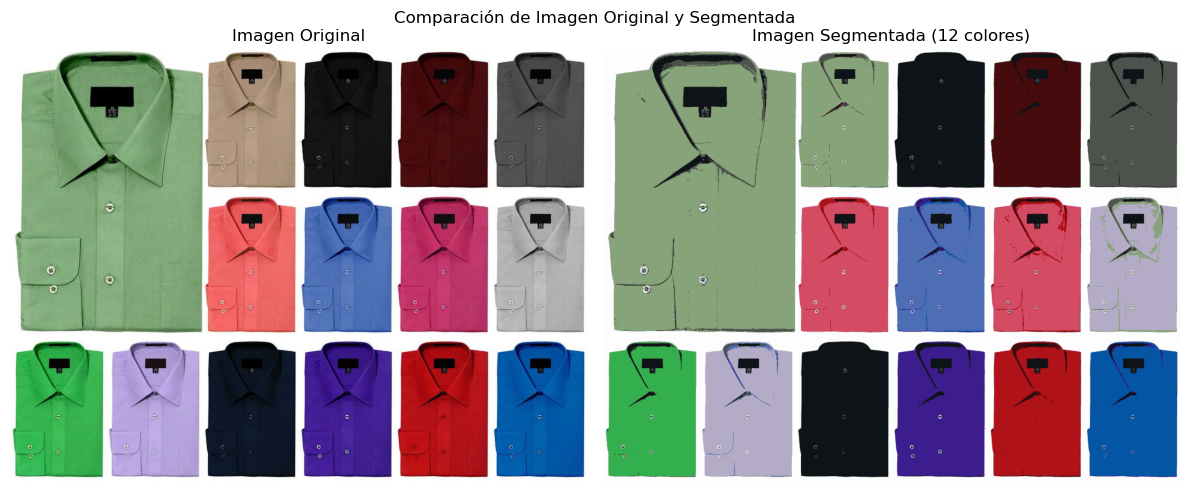

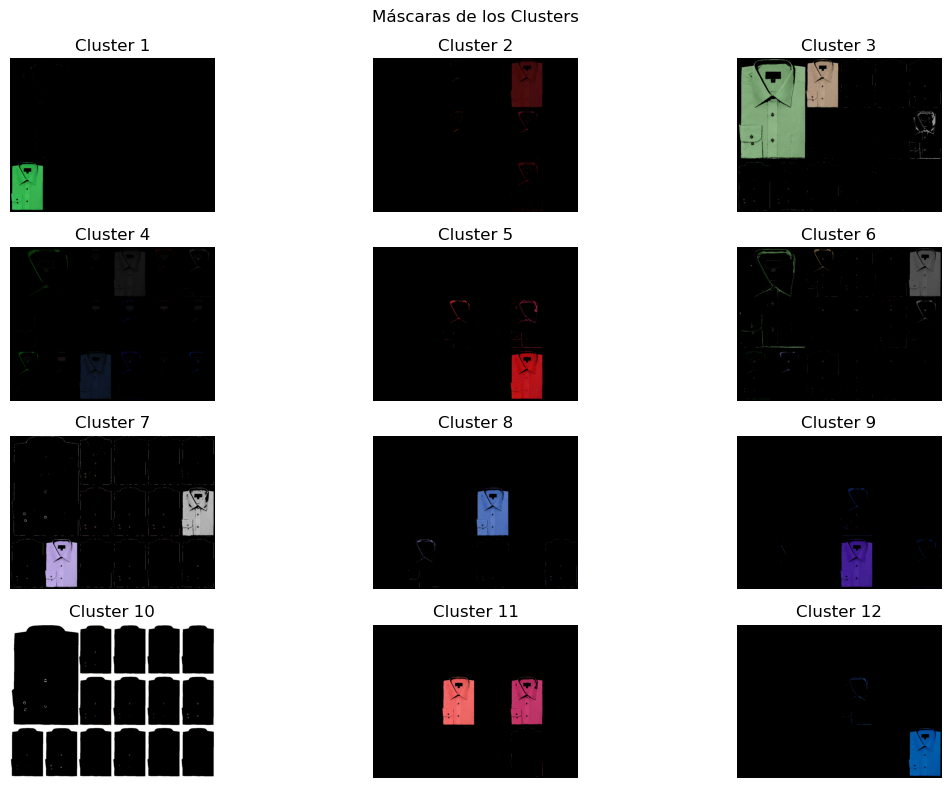

In [ ]:
path = 'data/images/camisas2.jpg'
K = 12
show_segmentation_example(path, K, figsize2=(12,8))

Detección de Señales de Tránsito

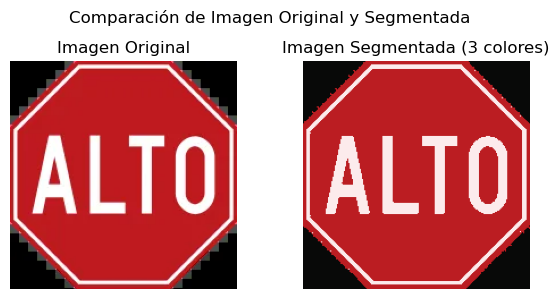

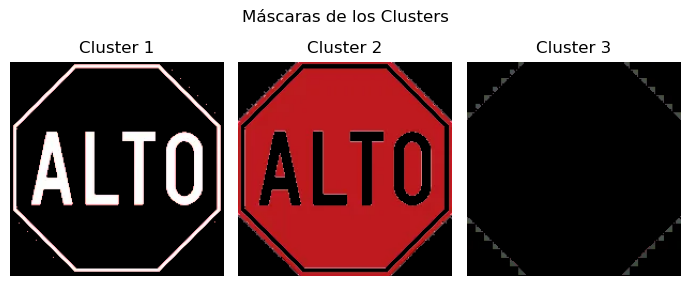

In [ ]:
path = 'data/images/alto.webp'
K = 3
show_segmentation_example(path, K, figsize1=(6,3), figsize2=(7,3))

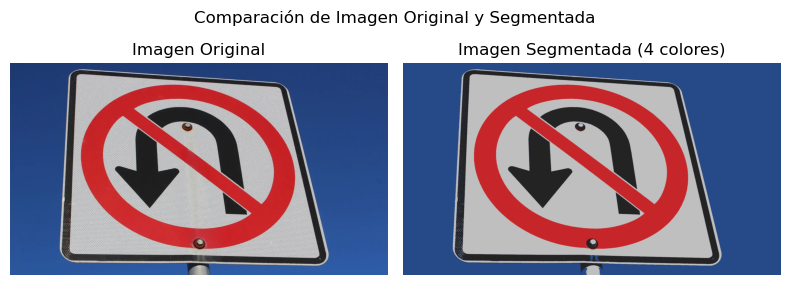

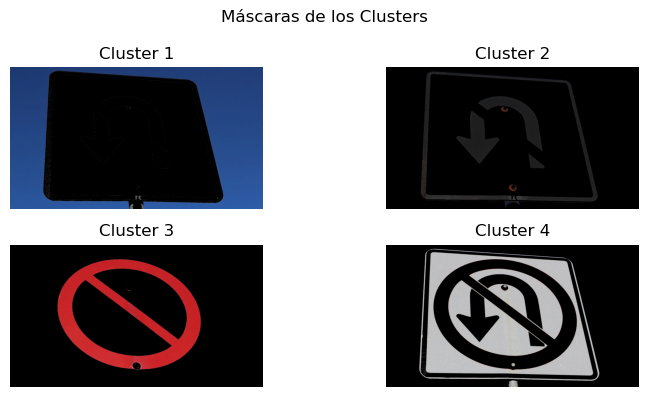

In [ ]:
path = 'data/images/señal.webp'
K = 4
show_segmentation_example(path, K, figsize1=(8,3), figsize2=(8,4),cols=2)

Identificación de Zonas Deforestadas

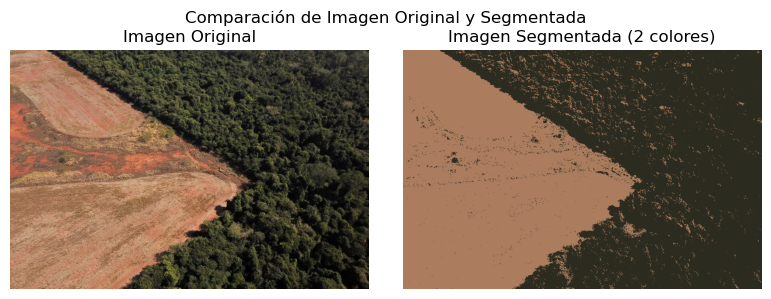

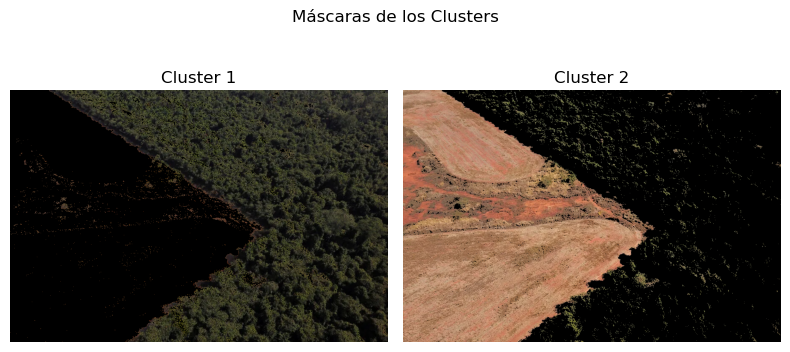

In [ ]:
path = 'data/images/zona_deforestada.webp'
K = 2
show_segmentation_example(path, K, figsize1=(8,3), figsize2=(8,4),cols=2)

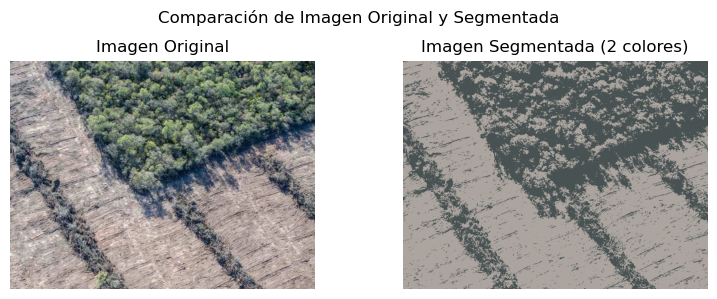

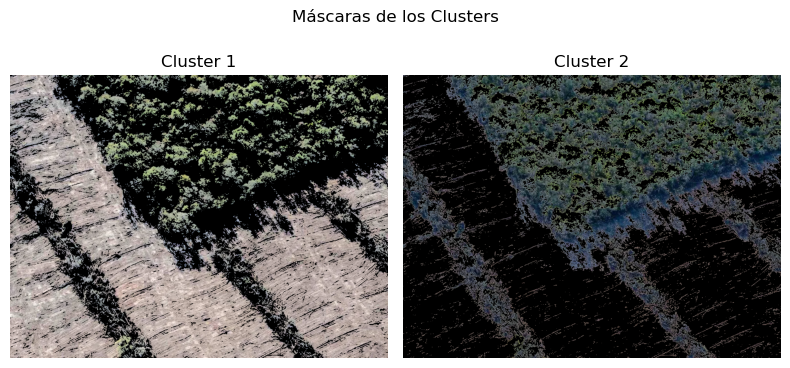

In [ ]:
path = 'data/images/zona_deforestada2.webp'
K = 2
show_segmentation_example(path, K, figsize1=(8,3), figsize2=(8,4),cols=2)

## Referencias

* Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
* Han, J., Kamber, M., & Pei, J. (2011). Data Mining: Concepts and Techniques (3rd ed.). Morgan Kaufmann.
* MacQueen, J. (1967). Some Methods for Classification and Analysis of Multivariate Observations. In Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability, Volume 1 (pp. 281-297).
* Lloyd, S. (1982). Least squares quantization in PCM. IEEE Transactions on Information Theory, 28(2), 129-137.
Jalagam, Mahesh Kumar & Nanda, Rupalin & Rath, Rama & Rao, Gade. (2020). Image Segmentation using K-means Clustering. Journal of Advanced Science. 3700-3704. 
* machine-learning_Dr.B. (2020, 7 abril). Image Segmentation via K-Means Clustering [Vídeo]. YouTube. https://www.youtube.com/watch?v=QVUUfoJxFZM
* Computerphile. (2016, 14 septiembre). K-Means & Image Segmentation - Computerphile [Vídeo]. YouTube. https://www.youtube.com/watch?v=yR7k19YBqiw
* First Principles of Computer Vision. (2021, 26 mayo). K-Means Segmentation | Image Segmentation [Vídeo]. YouTube. https://www.youtube.com/watch?v=22mpExWh1LY
* NeuralNine. (2023, 19 junio). Image Segmentation with K-Means Clustering in Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=X-Y91ddBqaQ
